<h1>Boston Housing

In this exercise we will use linear regression to predict housing prices in Boston. We will be taking the following steps from the Cross Industry Standard Processing for Data Mining:

<ol>Business Understanding</ol> 
<ol>EDA</ol> 
<ol>Data Preparation</ol> 
<ol>Modeling</ol> 
<ol>Evaluation</ol>

<h1>1. Business Understanding

This initial phase focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition, and a preliminary plan designed to achieve the objectives.

In this situation let's pretend we are a real estate agency in Boston MA and we are interested in purchasing some houses. We would like to know which houses are under value to help us narrow down the list and put in an accurate bid on a house.

<b>Objective:</b> Identify what makes a property valuable? What is a fair price for a house?

### Dataset : Boston
### Goal      : Predict medv column in Test Dataset!
<ol>
<li>	<b>	crim	:	</b>	per capita crime rate by town.
<li>	<b>	zn	:	</b>	proportion of residential land zoned for lots over 25,000 sq.ft.
<li>	<b>	indus	:	</b>	proportion of non-retail business acres per town.
<li>	<b>	chas	:	</b>	Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
<li>	<b>	nox	:	</b>	nitrogen oxides concentration (parts per 10 million).
<li>	<b>	rm	:	</b>	average number of rooms per dwelling.
<li>	<b>	age	:	</b>	proportion of owner-occupied units built prior to 1940.
<li>	<b>	dis	:	</b>	weighted mean of distances to five Boston employment centres.
<li>	<b>	rad	:	</b>	index of accessibility to radial highways.
<li>	<b>	tax	:	</b>	full-value property-tax rate per &#36;10,000.
<li>	<b>	ptratio	:	</b>	pupil-teacher ratio by town.
<li>	<b>	black	:	</b>	1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
<li>	<b>	lstat	:	</b>	lower status of the population (percent).
<li>	<b>	medv	:	</b>	median value of owner-occupied homes in &#36;1000s.
</ol>

Load Library

In [34]:
#import libraries for data handling
import os
import pandas as pd
import numpy as np

#import for visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#import for Linear regression
from sklearn.linear_model import LinearRegression

### Load Data into Pandas Dataframe

In [35]:
#Get Working Directory
cwd = os.getcwd()
cwd

# load the dataset
file = cwd+'/train.csv'
df = pd.read_csv(file)


Let us look into the data load.

In [21]:
# peek preview into the data
df.head(6)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0


Here we see first 5 rows. Data is loaded Successfully!

## 2. Data Understanding (EDA)

### Print a concise summary of a DataFrame.
This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [36]:
# Information on the Dataframe
print("\n\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


 None


In [7]:
#how big is the data?
print(df.size)

4995


Boxplot for all features. 

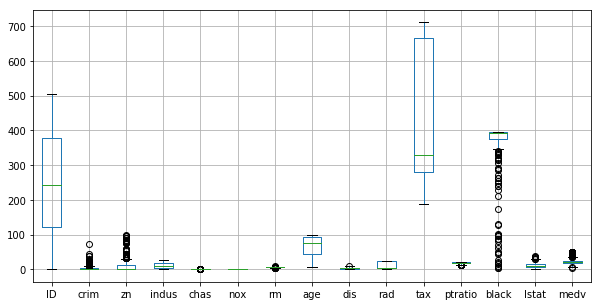

In [9]:
#box plot to see how means and range is distributed
df.boxplot(figsize=(10, 5))

### Understand Correlation between Dependednt (medv) and other Features

In [10]:
corr = df.corr().tail(1)
corr.sort_values(by='medv',axis=1)

,lstat,ptratio,indus,tax,nox,crim,age,rad,ID,chas,dis,black,zn,rm,medv
medv,-0.7386,-0.481376,-0.473932,-0.448078,-0.413054,-0.407454,-0.358888,-0.352251,-0.221694,0.20439,0.249422,0.33666,0.344842,0.689598,1.0


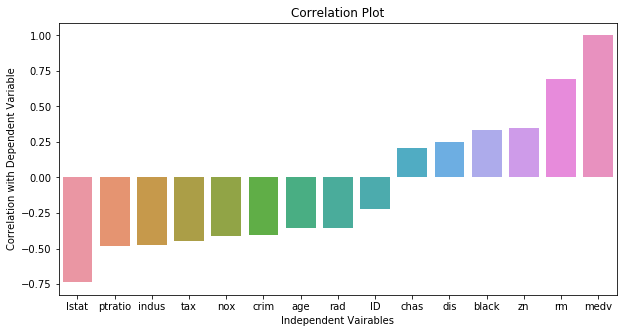

In [37]:
fig, ax = plt.subplots(figsize=(10,5))

plt.title("Correlation Plot")
plt.xlabel("Independent Vairables")
plt.ylabel("Correlation with Dependent Variable")

ax = sns.barplot(data=corr.sort_values(by='medv',axis=1))

### Correlation Based Inferences
<ol>
 <li> ID Column though has Negative correlation but actually does not have any value to the Data. Eliminating at at later stage
 <li> rm : +vely MOST Impacting: average number of rooms per dwelling has High Correlation with medv (Dependent Variable)
 <li> lstat : -vely MOST Impacting: lower status of the population (percent) has High Correlation with medv (Dependent Variable)

###  Bi-variate Data visualization

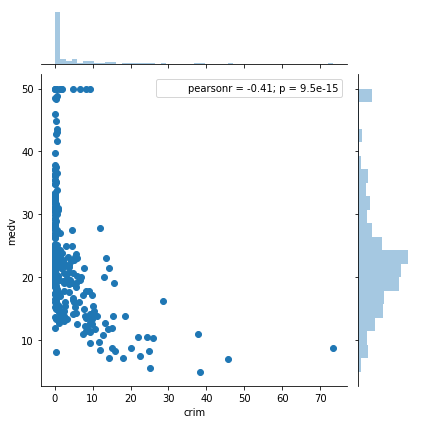

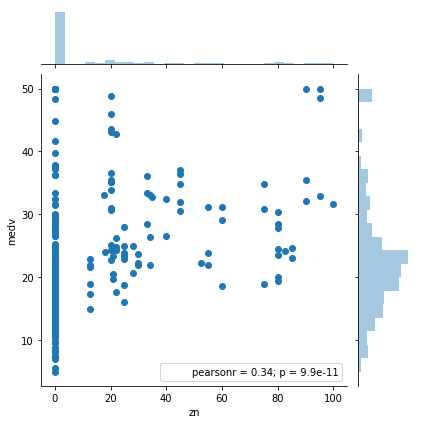

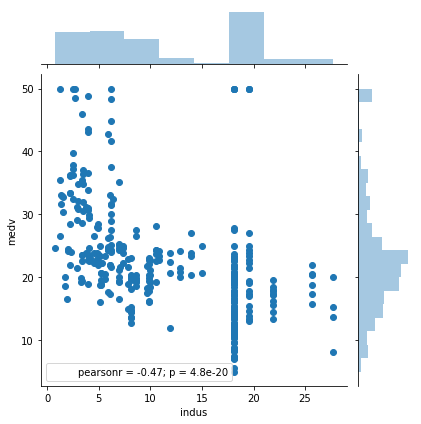

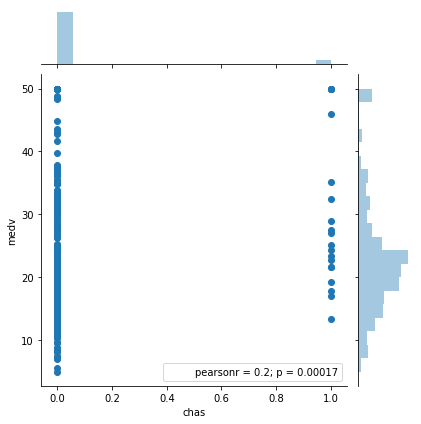

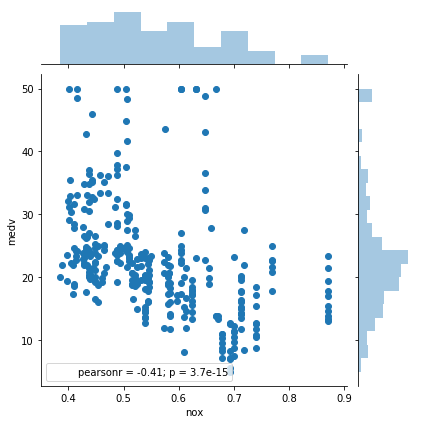

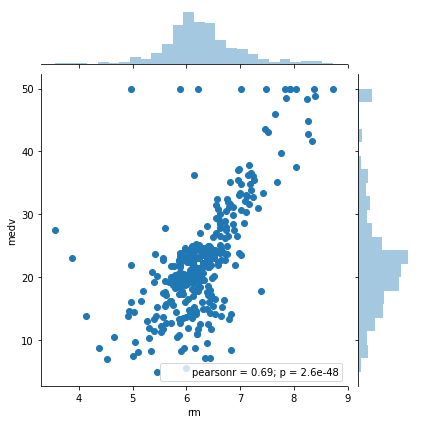

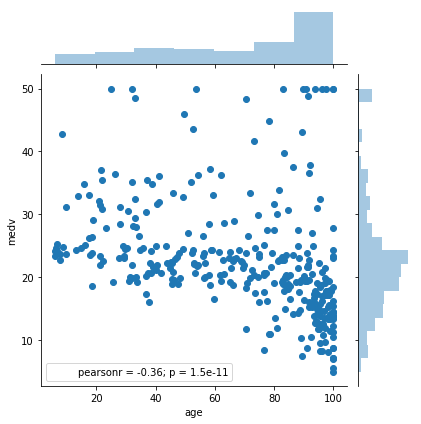

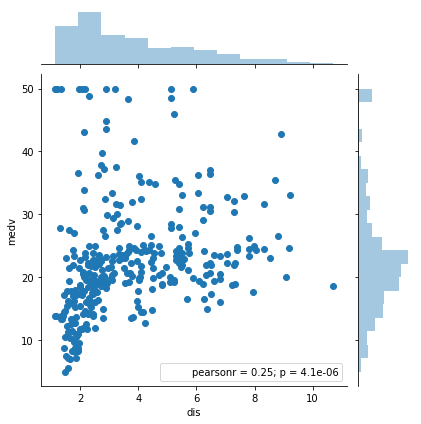

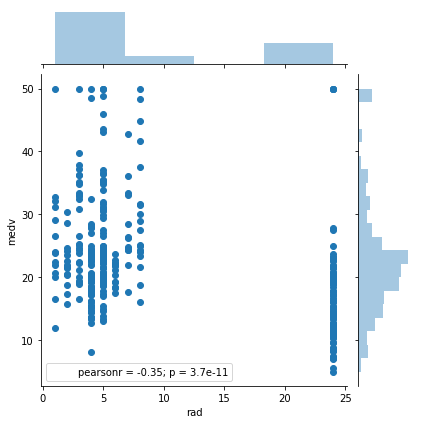

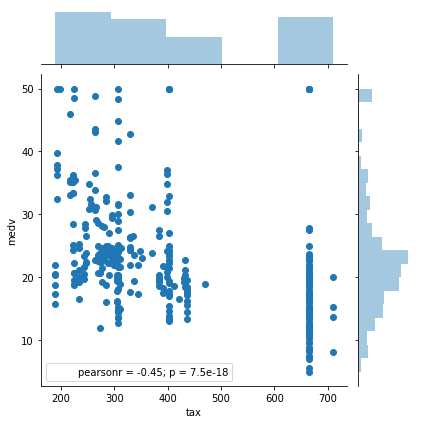

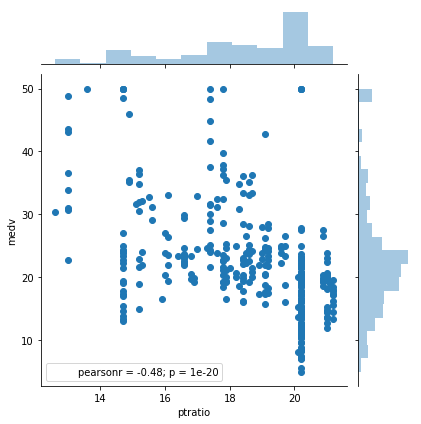

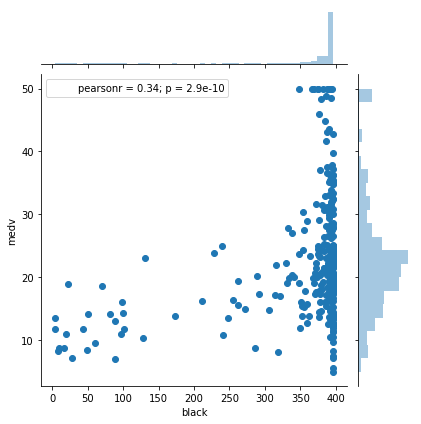

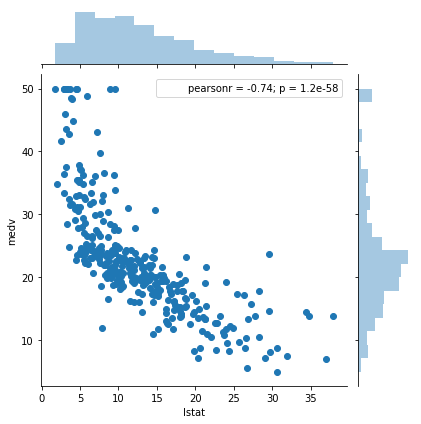

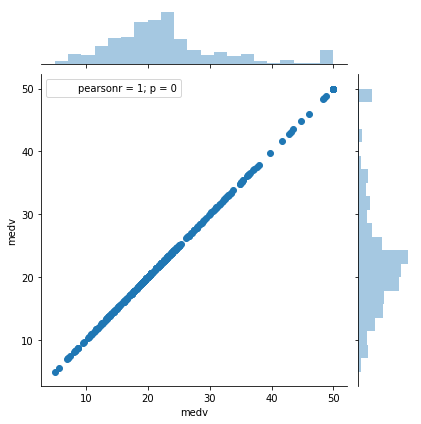

In [17]:
for index, columns in enumerate(df.columns):
    svm = sns.jointplot(df[df.columns[index]],df.medv)

#### Removed ID Column after sorting on ID

In [19]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [38]:
df1 = df.drop('ID',axis=1)

print("ID Column Dropped from Dataframe")

df1.head()

ID Column Dropped from Dataframe


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


##  Split Data into Test & Train

##### Benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm

<ul>

<li> <b>Motivation:</b> we need a way to choose between machine learning models and our goal is to estimate likely performance of a model on out-of-sample data.
<li> <b>Initial idea:</b> we can train and test on the same data. However this will cause overfitting. As the number of features in a dataset increases the problem will increase
<li><b>Alternative idea:</b> we can use train/test split. We can split the dataset into two pieces so that the model can be trained and tested on different data.
Then, testing accuracy is a better estimate than training accuracy of out-of-sample performance.
</ul>

In [39]:
predictor = df1.drop('medv', axis = 1)
print(" Dependent variable : 'medv' Column removed from features")
predictor.head()

 Dependent variable : 'medv' Column removed from features


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43


In [40]:
target = df1['medv']
target.head()

0    24.0
1    21.6
2    33.4
3    36.2
4    22.9
Name: medv, dtype: float64

#### train_test_split

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(predictor, target, test_size=0.3, shuffle=True)

# Success
print("Training and testing split was successful")

Training and testing split was successful


In [42]:
print("Training Predictor dimension :",x_train.shape)
print("Training Target dimension :",y_train.shape)
print("Test Predictor dimension :",x_test.shape)
print("Test Target dimension :",y_test.shape)

Training Predictor dimension : (233, 13)
Training Target dimension : (233,)
Test Predictor dimension : (100, 13)
Test Target dimension : (100,)


# Model

## lm1 : Raw data only removing ID

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Model Training
lm1 = LinearRegression(fit_intercept=True,normalize=False)
print("Parameters of Linear Regressor function : ",lm1.get_params)

#Model Training
lm1.fit(x_train,y_train)

Parameters of Linear Regressor function :  <bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Prediction of Y based on test sample

In [44]:
y_pred = lm1.predict(x_test)
print("Total number of predicted values = ",y_pred.shape)

Total number of predicted values =  (100,)


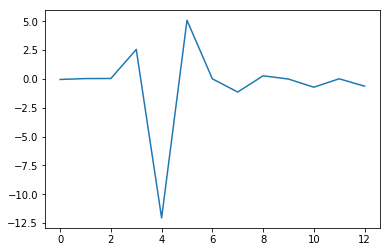

In [33]:
# The coefficients
plt.plot(lm1.coef_)

#### Model Evaluation

##### 1. root-mean-square error (RMSE) for the Model
##### 2. R-Sqauared for the Model

In [45]:
from math import sqrt

#Calculate root-mean-square error (RMSE):
print("R-Squared for the above model : ",r2_score(y_test,y_pred)*100,"%")

#Calculate R-squared for the Model:
print("\nroot-mean-square error (RMSE) for the model is : ",sqrt(mean_squared_error(y_test,y_pred)))

R-Squared for the above model :  76.14275213740606 %

root-mean-square error (RMSE) for the model is :  4.094319531975373


R - square is <b>60% and RMSE is 6.3</b>. certainly this model requires improvement.
<br>Reran the same model: R - square is <b>76% and RMSE is 4.0</b>. did I overfit this one?

##### 1. Using Statmodels.api to train the model
##### 2. Print Summary for the Model

In [46]:
import statsmodels.api as sm

model = sm.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     363.0
Date:                Thu, 05 Jul 2018   Prob (F-statistic):          1.26e-140
Time:                        16:45:54   Log-Likelihood:                -716.81
No. Observations:                 233   AIC:                             1460.
Df Residuals:                     220   BIC:                             1504.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.0220      0.065     -0.338      0.736      -0.150       0.106
zn             0.0362      0.024      1.536      0.126      -0.010       0.083
indus          0.0425      0.101      0.422      0.673      -0.156       0.241
chas           2.7806      1.610      1.728      0.085      -0.391       5.953
nox           -2.0604      5.274     -0.391      0.696     -12.454       8.333
rm             5.9156      0.494     11.978      0.000       4.942       6.889
age           -0.0190      0.022     -0.846      0.399      -0.063       0.025
dis           -1.0085      0.318     -3.168      0.002      -1.636      -0.381
rad            0.2577      0.106      2.421      0.016       0.048       0.467
tax           -0.0084      0.006     -1.363      0.174      -0.021       0.004
ptratio       -0.4984      0.173     -2.879      0.004      -0.840      -0.157
black          0.0206      0.005      4.534      0.000       0.012       0.030
lstat         -0.4917      0.081     -6.104      0.000      -0.650      -0.333
==============================================================================
Omnibus:                       98.098   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              446.388
Skew:                           1.653   Prob(JB):                     1.17e-97
Kurtosis:                       8.921   Cond. No.                     8.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## lm2 : Removing ID, Chas , crim and indus
### ID, Chas(this stands out in coefficient), crim and indus(least influcing as per p-value)

In [47]:
df2 = df.drop('ID',axis=1)
print("ID Column Dropped from Dataframe")

df2 = df2.drop('chas',axis=1)
print("chas Column Dropped from Dataframe")

df2 = df2.drop('crim',axis=1)
print("crim Column Dropped from Dataframe")

df2 = df2.drop('indus',axis=1)
print("indus Column Dropped from Dataframe")

df2.head()

ID Column Dropped from Dataframe
chas Column Dropped from Dataframe
crim Column Dropped from Dataframe
indus Column Dropped from Dataframe


,zn,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,18.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,12.5,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [48]:

#get Predictor Dataframe
predictor = df2.drop('medv', axis = 1)
print(" Dependent variable : 'medv' Column removed from features")
predictor.head()

#get Target Dataframe
target = df2['medv']
target.head()

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(predictor, target, test_size=0.3, shuffle=True)

# Success
print("Training and testing split was successful")

print("Training Predictor dimension :",x_train.shape)
print("Training Target dimension :",y_train.shape)
print("Test Predictor dimension :",x_test.shape)
print("Test Target dimension :",y_test.shape)

 Dependent variable : 'medv' Column removed from features
Training and testing split was successful
Training Predictor dimension : (233, 10)
Training Target dimension : (233,)
Test Predictor dimension : (100, 10)
Test Target dimension : (100,)


Parameters of Linear Regressor function :  <bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>
Total number of predicted values =  (100,)


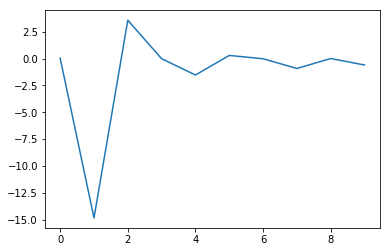

In [49]:
#import library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Model Training
lm2 = LinearRegression(fit_intercept=True,normalize=False)
print("Parameters of Linear Regressor function : ",lm2.get_params)

#Model Training
lm2.fit(x_train,y_train)

#Predict
y_pred = lm2.predict(x_test)
print("Total number of predicted values = ",y_pred.shape)

# The coefficients
plt.plot(lm2.coef_)

#### Model Evaluation

In [50]:
#Model Evaluation

from math import sqrt

#Calculate root-mean-square error (RMSE):
print("R-Squared for the above model : ",r2_score(y_test,y_pred)*100,"%")

#Calculate R-squared for the Model:
print("\nroot-mean-square error (RMSE) for the model is : ",sqrt(mean_squared_error(y_test,y_pred)))

R-Squared for the above model :  69.79667340231316 %

root-mean-square error (RMSE) for the model is :  5.1665910032545295


<b> RMSE 69.79% and R-square 5.1</b> This is improvement since first one.

## lm3 : Removing outliers based in 3 SD
### Removed ID, Chas, crim and indus and OUTLIERS

In [51]:
#since columns are removed in df2 we will take it as startging
df2.head()
print ("taking df2 as starting.")

#remove ouliers
from scipy import stats
df3 = df2[(np.abs(stats.zscore(df1)) < 3).all(axis=1)]
print ("outliers removed beyond 3SD.")

df3.head()

taking df2 as starting.
outliers removed beyond 3SD.


,zn,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,18.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,12.5,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [58]:

#get Predictor Dataframe
predictor = df3.drop('medv', axis = 1)
print(" Dependent variable : 'medv' Column removed from features")
predictor.head()

#get Target Dataframe
target = df3['medv']
target.head()

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(predictor, target, test_size=0.3, shuffle=True)

# Success
print("Training and testing split was successful")

print("Training Predictor dimension :",x_train.shape)
print("Training Target dimension :",y_train.shape)
print("Test Predictor dimension :",x_test.shape)
print("Test Target dimension :",y_test.shape)

 Dependent variable : 'medv' Column removed from features
Training and testing split was successful
Training Predictor dimension : (187, 10)
Training Target dimension : (187,)
Test Predictor dimension : (81, 10)
Test Target dimension : (81,)


Parameters of Linear Regressor function :  <bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>
Total number of predicted values =  (81,)


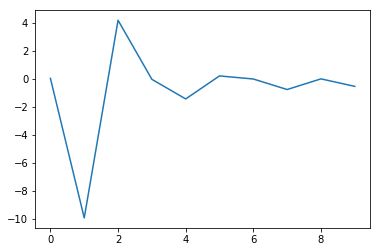

In [59]:
#import library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Model Training
lm3 = LinearRegression(fit_intercept=True,normalize=False)
print("Parameters of Linear Regressor function : ",lm3.get_params)

#Model Training
lm3.fit(x_train,y_train)

#Predict
y_pred = lm3.predict(x_test)
print("Total number of predicted values = ",y_pred.shape)

# The coefficients
plt.plot(lm3.coef_)

In [60]:
#Model Evaluation

from math import sqrt

#Calculate root-mean-square error (RMSE):
print("R-Squared for the above model : ",r2_score(y_test,y_pred)*100,"%")

#Calculate R-squared for the Model:
print("\nroot-mean-square error (RMSE) for the model is : ",sqrt(mean_squared_error(y_test,y_pred)))

R-Squared for the above model :  79.3252573394458 %

root-mean-square error (RMSE) for the model is :  3.637986808095612


#### WOOHH!! R-square 79.32% and RMSE 3.6